First round, titanic set

1. How many passengers are in our passenger list? From here forward, we’ll assume our dataset represents the full passenger list for the Titanic.

2. What is the overall survival rate?

3. How many male passengers were onboard?

4. How many female passengers were onboard?

5. What is the overall survival rate of male passengers?

6. What is the overall survival rate of female passengers?

7. What is the average age of all passengers onboard?
    * How did you calculate this average age?
    * Note that some of the passengers do not have an age value. How did you deal with this? What are some other ways of dealing with this?

8. What is the average age of passengers who survived?


9. What is the average age of passengers who did not survive?

10. At this (early) point in our analysis, what might you infer about any patterns you are seeing?

11. How many passengers are in each of the three classes of service (e.g. First, Second, Third?)

12. What is the survival rate for passengers in each of the three classes of service?

13. What else might you conclude?

14. Last, if we were to build a predictive model, which features in the data do you think we should include in the model and which can we leave out? Why?

### Dictionary
'Sex': 1 = Male, 0 = Female

'Pclass': 1 = High, 2 = Middle, 3 = Low

In [1]:
# Import necessary libraries
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import random

# inline plot
%matplotlib inline

In [2]:
df = pd.read_csv("./titanic.csv")
print df.dtypes
df.head(3)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# 1. How many passengers are in our passenger list? From here forward, we’ll assume our dataset represents the full passenger list for the Titanic.
print "There are {} passengers".format(len(df))
df.count()

There are 891 passengers


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
# 2. What is the overall survival rate?
print "There's a {}% chance you'll make it, if you got one of those tickets.".format(df.loc[df['Survived'] == 1,'Survived'].sum()/float(len(df))*100)

There's a 38.3838383838% chance you'll make it, if you got one of those tickets.


In [5]:
# 3. How many male passengers were onboard?
# 4. How many female passengers were onboard?
print df['Sex'].unique()
df.loc[df['Sex'] == 'male','Sex'] = 1
df.loc[df['Sex'] == 'female','Sex'] = 0
print "male:", df.loc[df['Sex'] == 1,'Sex'].count()
print "female:", df.loc[df['Sex'] == 0,'Sex'].count()
print "double check:", df.loc[df['Sex'] == 1,'Sex'].count() + df.loc[df['Sex'] == 0,'Sex'].count()

['male' 'female']
male: 577
female: 314
double check: 891


In [6]:
# 5. What is the overall survival rate of male passengers?
# 6. What is the overall survival rate of female passengers?
male_survived = df.loc[(df['Sex'] == 1) & (df['Survived']==1),'Sex'].count() / float(df.loc[df['Sex']==1,'Sex'].count())
female_survived = df.loc[(df['Sex'] == 0) & (df['Survived']==1),'Sex'].count() / float(df.loc[df['Sex']==0,'Sex'].count())
print "Only {men}% of men survived, vs. {women}% of women".format(men=male_survived*100,women=female_survived*100)

Only 18.8908145581% of men survived, vs. 74.2038216561% of women


In [40]:
# 7. What is the average age of all passengers onboard?
print "Empty age ranges:",df['Age'].isnull().sum() # Returns 177, so almost 20% of the dataset
# df['Age'] = df['Age'].fillna(df['Age'].median()) # Fill empy values with the median age of the passengers
df['Age'] = df['Age'].fillna(np.nan) # Fill empy values with the numpy nulls
print "Filled in with Median age:",df['Age'].isnull().sum() # Returns 177, so almost 20% of the dataset
print "Mean age is ",df['Age'].mean()
print "Median age is ",df['Age'].median()
print "Max age is ",df['Age'].max()
print "Min age is ",df['Age'].min()

Empty age ranges: 177
Filled in with Median age: 177
Mean age is  29.6991176471
Median age is  28.0
Max age is  80.0
Min age is  0.42


In [8]:
# 9. What is the average age of passengers who did not survive?
print "Mean age of survivor: ",df.loc[df['Survived'] == 1,'Age'].mean()

Mean age of survivor:  28.3436896552


``` 10. At this (early) point in our analysis, what might you infer about any patterns you are seeing?```

The survivors skewed slightly younger, and heavily towards women. Being an older male on the titanic would have been ill advised. 

In [20]:
# 11. How many passengers are in each of the three classes of service (e.g. First, Second, Third?)
df.groupby('Pclass').describe()

Age        Fare       Parch  PassengerId       SibSp  \
Pclass                                                                      
1      count  186.000000  216.000000  216.000000   216.000000  216.000000   
       mean    38.233441   84.154687    0.356481   461.597222    0.416667   
       std     14.802856   78.380373    0.693997   246.737616    0.611898   
       min      0.920000    0.000000    0.000000     2.000000    0.000000   
       25%     27.000000   30.923950    0.000000   270.750000    0.000000   
       50%     37.000000   60.287500    0.000000   472.000000    0.000000   
       75%     49.000000   93.500000    0.000000   670.500000    1.000000   
       max     80.000000  512.329200    4.000000   890.000000    3.000000   
2      count  173.000000  184.000000  184.000000   184.000000  184.000000   
       mean    29.877630   20.662183    0.380435   445.956522    0.402174   
       std     14.001077   13.417399    0.690963   250.852161    0.601633   
       min      0.670000    0.000000    0.000000    10.000000    0.000000   
       25%     23.000000   13.000000    0.000000   234.500000    0.000000   
       50%     29.000000   14.250000    0.000000   435.500000    0.000000   
       75%     36.000000   26.000000    1.000000   668.000000    1.000000   
       max     70.000000   73.500000    3.000000   887.000000    3.000000   
3      count  355.000000  491.000000  491.000000   491.000000  491.000000   
       mean    25.140620   13.675550    0.393075   439.154786    0.615071   
       std     12.495398   11.778142    0.888861   264.441453    1.374883   
       min      0.420000    0.000000    0.000000     1.000000    0.000000   
       25%     18.000000    7.750000    0.000000   200.000000    0.000000   
       50%     24.000000    8.050000    0.000000   432.000000    0.000000   
       75%     32.000000   15.500000    0.000000   666.500000    1.000000   
       max     74.000000   69.550000    6.000000   891.000000    8.000000   

                Survived  
Pclass                    
1      count  216.000000  
       mean     0.629630  
       std      0.484026  
       min      0.000000  
       25%      0.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
2      count  184.000000  
       mean     0.472826  
       std      0.500623  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      1.000000  
       max      1.000000  
3      count  491.000000  
       mean     0.242363  
       std      0.428949  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      0.000000  
       max      1.000000

Class 1:  216
Class 2:  184
Class 3:  491


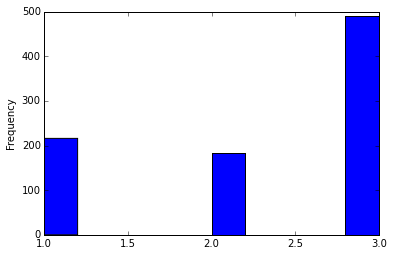

In [32]:
df['Pclass'].plot(kind="hist")
print 'Class 1: ', df.loc[df['Pclass'] == 1,'Pclass'].count()
print 'Class 2: ', df.loc[df['Pclass'] == 2,'Pclass'].count()
print 'Class 3: ', df.loc[df['Pclass'] == 3,'Pclass'].count()

In [39]:
# 12. What is the survival rate for passengers in each of the three classes of service?
print 'Class 1 survival rate: {0:.2f}%'.format(df.loc[(df['Pclass'] == 1) & (df['Survived'] == 1),'Pclass'].count() / float(df.loc[df['Pclass'] == 1,'Pclass'].count())*100)
print 'Class 2 survival rate: {0:.2f}%'.format(df.loc[(df['Pclass'] == 2) & (df['Survived'] == 1),'Pclass'].count() / float(df.loc[df['Pclass'] == 2,'Pclass'].count())*100)
print 'Class 3 survival rate: {0:.2f}%'.format(df.loc[(df['Pclass'] == 3) & (df['Survived'] == 1),'Pclass'].count() / float(df.loc[df['Pclass'] == 3,'Pclass'].count())*100)

Class 1 survival rate: 62.96%
Class 2 survival rate: 47.28%
Class 3 survival rate: 24.24%


#### 13. What else might you conclude?

You are a lot more likely to survive the sinking of the titanic if you are rich.

#### 14. Last, if we were to build a predictive model, which features in the data do you think we should include in the model and which can we leave out? Why?

```
PassengerId      int64 - Necessary to track uniques
Survived         int64 - Needed to vet the model, but would be removed
Pclass           int64 - Class distinction is an indicator of wealth, keep
Name            object - Probably not important, remove. Maybe "jr" or similar might indicate tohugh?
Sex             object - Gender is a predictor of survivability
Age            float64 - Age is probably a predictor of survivability, with the max age being 80 and mean survival being 28
SibSp            int64 - Maybe a predictor (siblings?)
Parch            int64 - Maybe a predictor (parents?_)
Ticket          object - If you know the structure and point of impact, maybe?
Fare           float64 - Might indicate where you were relative to sea level, or check on Pclass?
Cabin           object - If you know the point of impact
Embarked        object - Probably unimportant relative to survivability
```
